In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [4]:
# Load the dataset
print("Loading dataset...")
df = pd.read_csv("survey lung cancer.csv")
print("Dataset loaded successfully.\n")

Loading dataset...
Dataset loaded successfully.



In [5]:
# Encode categorical variables
print("Encoding categorical variables...")
label_encoder = LabelEncoder()
for col in ['GENDER', 'LUNG_CANCER']:
    df[col] = label_encoder.fit_transform(df[col])
print("Categorical variables encoded.\n")

Encoding categorical variables...
Categorical variables encoded.



In [6]:
# Handle missing values using KNN Imputer
print("Handling missing values using KNN Imputer...")
imputer = KNNImputer(n_neighbors=5)
df.iloc[:, :] = imputer.fit_transform(df)
print("Missing values handled.\n")

Handling missing values using KNN Imputer...
Missing values handled.



Plotting feature correlation heatmap...


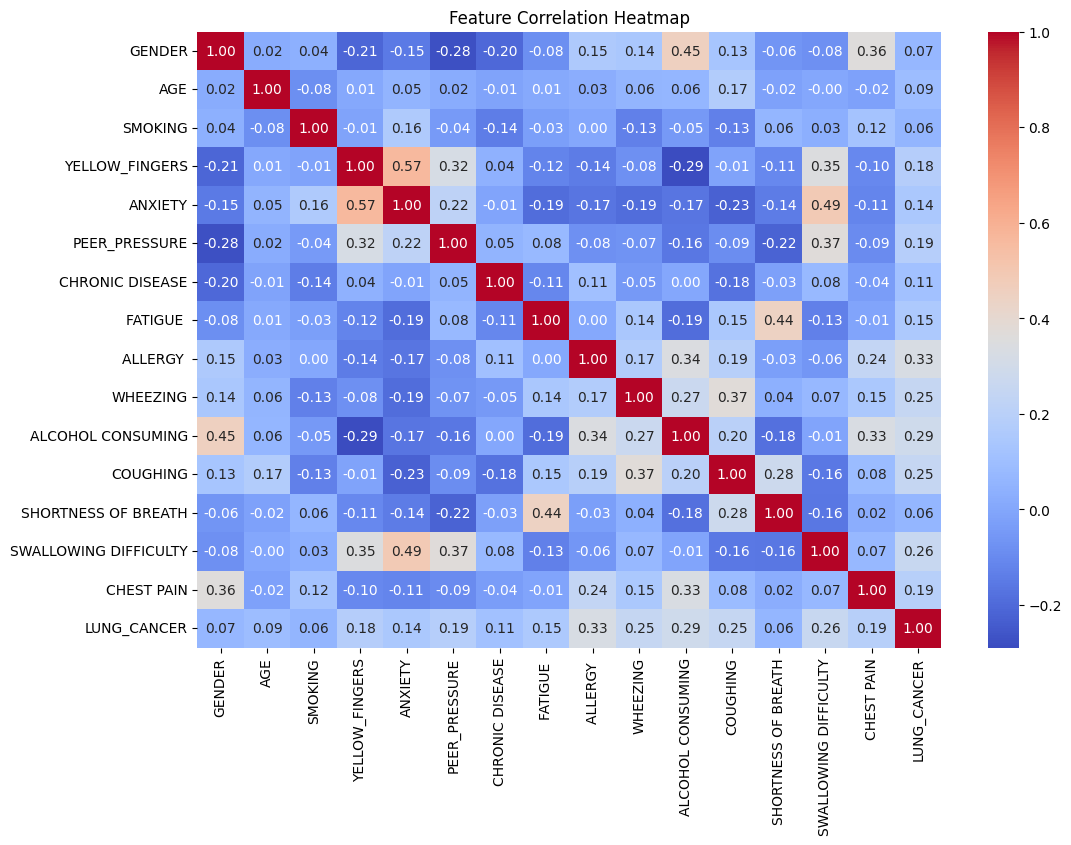

Feature correlation heatmap displayed.



In [7]:
# Check correlation between features
print("Plotting feature correlation heatmap...")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
print("Feature correlation heatmap displayed.\n")

Checking class imbalance before oversampling...


<ipython-input-8-fa9596aaa6dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['LUNG_CANCER'], palette="coolwarm")


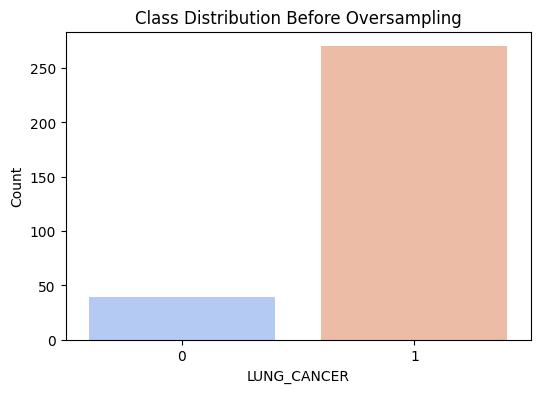

Class imbalance before oversampling plotted.



In [8]:
# Check class imbalance
print("Checking class imbalance before oversampling...")
plt.figure(figsize=(6, 4))
sns.countplot(x=df['LUNG_CANCER'], palette="coolwarm")
plt.title("Class Distribution Before Oversampling")
plt.xlabel("LUNG_CANCER")
plt.ylabel("Count")
plt.show()
print("Class imbalance before oversampling plotted.\n")

In [9]:
# Handle class imbalance
y = df['LUNG_CANCER']
X = df.drop(columns=['LUNG_CANCER'])

In [10]:
print("Applying SMOTE for oversampling...")
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
print("SMOTE applied successfully.\n")

Applying SMOTE for oversampling...
SMOTE applied successfully.



In [11]:
print("Applying ADASYN for additional oversampling...")
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)
print("ADASYN applied successfully.\n")

Applying ADASYN for additional oversampling...
ADASYN applied successfully.



Checking class imbalance after oversampling...


<ipython-input-12-bb1c6c4b41b0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


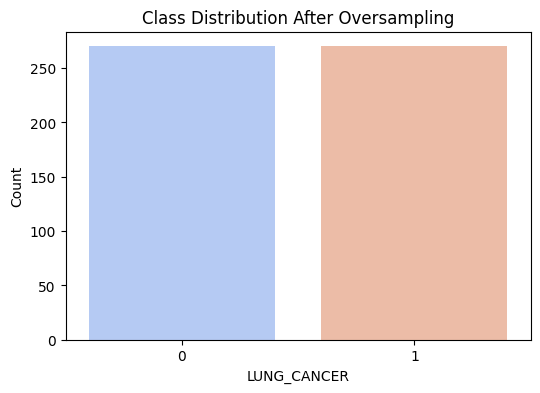

Class imbalance after oversampling plotted.



In [12]:
# Check class imbalance after oversampling
print("Checking class imbalance after oversampling...")
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Class Distribution After Oversampling")
plt.xlabel("LUNG_CANCER")
plt.ylabel("Count")
plt.show()
print("Class imbalance after oversampling plotted.\n")

In [13]:
# Feature selection using Decision Tree importance
print("Training temporary Decision Tree for feature selection...")
clf_temp = DecisionTreeClassifier(random_state=42)
clf_temp.fit(X, y)
feature_importances = pd.Series(clf_temp.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature selection completed.\n")

Training temporary Decision Tree for feature selection...
Feature selection completed.



Plotting feature importance...


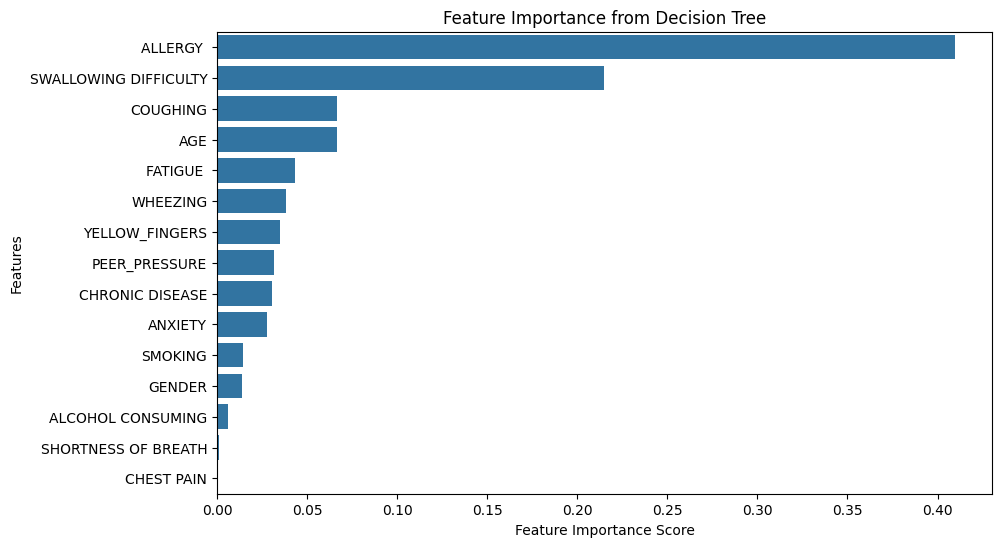

Feature importance plotted.



In [14]:
# Plot feature importance
print("Plotting feature importance...")
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Decision Tree")
plt.show()
print("Feature importance plotted.\n")

In [15]:
# Remove weak features
threshold = 0.02
print(f"Removing features with importance score below {threshold}...")
X = X.drop(columns=feature_importances[feature_importances < threshold].index)
print("Weak features removed.\n")

Removing features with importance score below 0.02...
Weak features removed.



In [16]:
# Train-test split
print("Splitting dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split completed.\n")

Splitting dataset into training and testing sets...
Dataset split completed.



In [17]:
# Hyperparameter tuning
print("Starting hyperparameter tuning using GridSearchCV...")
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 5, 10],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
print("Hyperparameter tuning completed.\n")

Starting hyperparameter tuning using GridSearchCV...
Hyperparameter tuning completed.



Analyzing test accuracy vs. max depth of the tree...


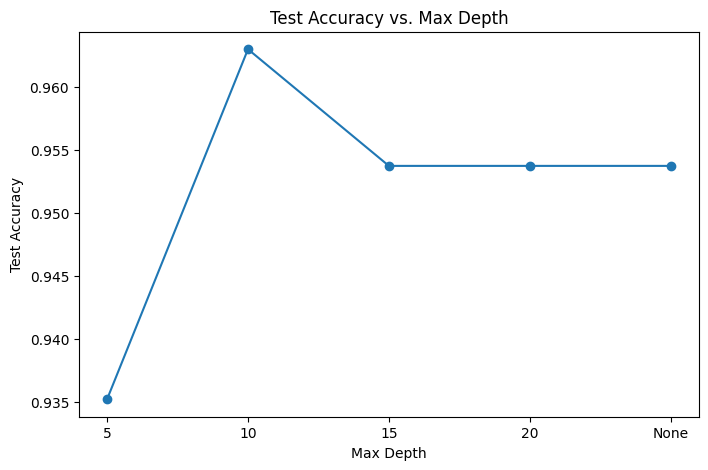

Test accuracy vs. max depth analysis completed.



In [18]:
# Accuracy vs. Max Depth
print("Analyzing test accuracy vs. max depth of the tree...")
max_depths = [5, 10, 15, 20, None]
accuracies = []
for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(max_depths[:-1] + ["None"], accuracies, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. Max Depth")
plt.show()
print("Test accuracy vs. max depth analysis completed.\n")

Analyzing train accuracy vs. number of folds in cross-validation...


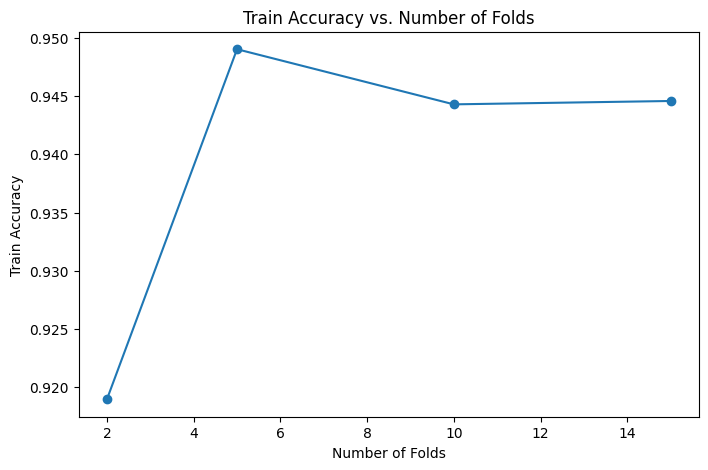

Train accuracy vs. number of folds analysis completed.



In [19]:
# Train Accuracy vs. No. of Folds
print("Analyzing train accuracy vs. number of folds in cross-validation...")
folds = [2, 5, 10, 15]
train_accuracies = []
for fold in folds:
    scores = cross_val_score(best_clf, X_train, y_train, cv=fold, scoring='accuracy')
    train_accuracies.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(folds, train_accuracies, marker='o')
plt.xlabel("Number of Folds")
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy vs. Number of Folds")
plt.show()
print("Train accuracy vs. number of folds analysis completed.\n")

Comparing model accuracy with research papers...


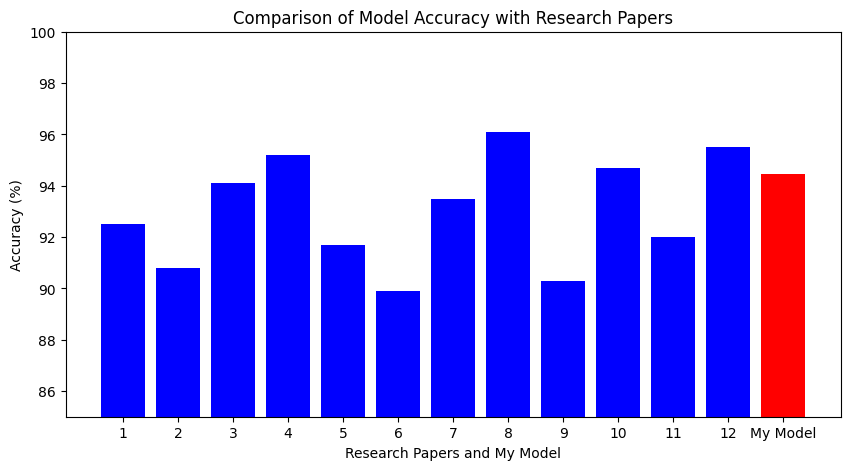

Comparison completed.



In [20]:
# Research paper accuracies
paper_accuracies = [92.5, 90.8, 94.1, 95.2, 91.7, 89.9, 93.5, 96.1, 90.3, 94.7, 92.0, 95.5]
paper_numbers = np.arange(1, len(paper_accuracies) + 1)

# My model's accuracy
model_accuracy = accuracy_score(y_test, best_clf.predict(X_test)) * 100

# Extend x-axis for "My Model"
x_values = np.append(paper_numbers, len(paper_numbers) + 1)
y_values = paper_accuracies + [model_accuracy]

# Plot bar chart
print("Comparing model accuracy with research papers...")
plt.figure(figsize=(10, 5))
plt.bar(x_values, y_values, color=['blue'] * len(paper_accuracies) + ['red'])

# Set x-axis labels
labels = [str(i) for i in paper_numbers] + ["My Model"]
plt.xticks(x_values, labels)

plt.xlabel("Research Papers and My Model")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracy with Research Papers")
plt.ylim(85, 100)
plt.show()
print("Comparison completed.\n")

Generating confusion matrix...


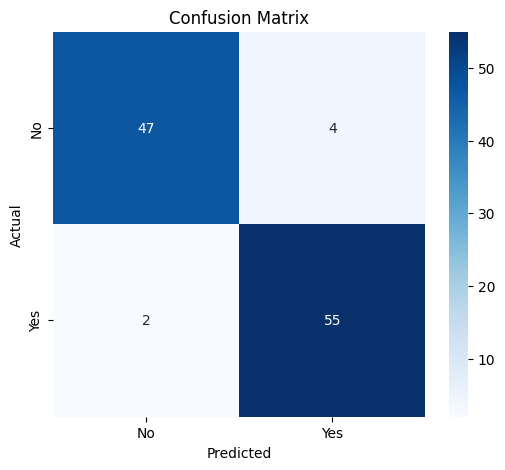

Confusion matrix generated.



In [21]:
# Confusion Matrix
print("Generating confusion matrix...")
y_pred = best_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Confusion matrix generated.\n")

In [22]:
# Print final metrics
print(f"Final Accuracy: {model_accuracy:.2f}%")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Final Accuracy: 94.44%
Precision: 0.93
Recall: 0.96
F1-score: 0.95
